<a href="https://colab.research.google.com/github/Yamm23/Learning-Macine-Learning/blob/main/WW2_Aircraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Import Necessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/LearningAI_CSV/WW2_Aircraft/world_war_2_aircrafts.csv")

In [13]:
df.head()

,Aircraft Type,Aircraft Subtype,Aircraft Name,Year in Service,Country of Origin,Operator(s) if different from country of origin
0,Fighter aircraft,Biplane fighters,Armstrong Whitworth Scimitar,1936,UK,Norway
1,Fighter aircraft,Biplane fighters,Avia B-534,1935,Czechoslovakia,"Czechoslovakia, Bulgaria, Germany, Greece, Slo..."
2,Fighter aircraft,Biplane fighters,Avia BH-33,1927,Czechoslovakia,Yugoslavia
3,Fighter aircraft,Biplane fighters,Blériot-SPAD S.510,1936,France,NaN
4,Fighter aircraft,Biplane fighters,Boeing P-12,1930,US,"Brazil, China, Philippines, Thailand"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Aircraft Type                                    1176 non-null   object
 1   Aircraft Subtype                                 1176 non-null   object
 2   Aircraft Name                                    1175 non-null   object
 3   Year in Service                                  1173 non-null   object
 4   Country of Origin                                1175 non-null   object
 5   Operator(s) if different from country of origin  567 non-null    object
dtypes: object(6)
memory usage: 55.3+ KB


In [15]:
df.isnull().sum()

,0
Aircraft Type,0
Aircraft Subtype,0
Aircraft Name,1
Year in Service,3
Country of Origin,1
Operator(s) if different from country of origin,609


In [16]:
df.describe()

,Aircraft Type,Aircraft Subtype,Aircraft Name,Year in Service,Country of Origin,Operator(s) if different from country of origin
count,1176,1176,1175,1173,1175,567
unique,12,33,1166,28,33,407
top,Prototypes,"Communications, Liaison and Light transport ai...",Boeing B-17 Flying Fortress,1940,US,"US, UK"
freq,292,93,2,113,272,16


In [17]:
df['Aircraft Name']

,Aircraft Name
0,Armstrong Whitworth Scimitar
1,Avia B-534
2,Avia BH-33
3,Blériot-SPAD S.510
4,Boeing P-12
...,...
1171,Mistel
1172,Northrop JB-1 Bat
1173,Republic-Ford JB-2
1174,Rheinmetall-Borsig Feuerlilie


In [18]:
df['Manufacturer'] = df['Aircraft Name'].str.split().str[0].str.strip()

In [19]:
df['Manufacturer'].unique()

array(['Armstrong', 'Avia', 'Blériot-SPAD', 'Boeing', 'Bristol',
       'Curtiss', 'Fiat', 'Gloster', 'Grumman', 'Hawker', 'Heinkel',
       'IMAM', 'Kawasaki', 'Kochyerigin', 'Koolhoven', 'Polikarpov',
       'Prajadhipok', 'Ambrosini', 'Ansaldo', 'Arsenal', 'Bell', 'Bloch',
       'Breda', 'Brewster', 'CAC', 'Caudron', 'Curtiss-Wright',
       'Dewoitine', 'Focke-Wulf', 'Fokker', 'IAR', 'Ikarus', 'Kawanishi',
       'Lavochkin-Gorbunov-Gudkov', 'Lavochkin', 'Loire', 'Macchi',
       'MÁVAG', 'Messerschmitt', 'Mikoyan-Gurevich', 'Mitsubishi',
       'Morane-Saulnier', 'Nakajima', 'North', 'PZL', 'Reggiane',
       'Republic', 'Rogožarski', 'Seversky', 'Supermarine', 'VL',
       'Vought', 'Vultee', 'Yakovlev', nan, 'Blackburn', 'Boulton', 'de',
       'Dornier', 'Douglas', 'Fairey', 'Junkers', 'Lockheed', 'Northrop',
       'Petlyakov', 'Potez', 'Westland', 'Ryan', 'Avro', 'Blohm',
       'Consolidated', 'Farman', 'Handley', 'Piaggio', 'Short', 'Tupolev',
       'Vickers', 'Amiot', 'A

In [20]:
curtiss_count = (df['Manufacturer']=='Curtiss').sum()
curtiss_count

np.int64(20)

In [21]:
df[df['Aircraft Name'].str.split().str[0].str.strip()=='Curtiss'].shape[0]

20

In [22]:
df[df['Aircraft Name'].str.startswith('C', na = False)]

,Aircraft Type,Aircraft Subtype,Aircraft Name,Year in Service,Country of Origin,Operator(s) if different from country of origin,Manufacturer
6,Fighter aircraft,Biplane fighters,Curtiss Hawk II,1932,US,China,Curtiss
7,Fighter aircraft,Biplane fighters,Curtiss Hawk III,1933,US,"China, Thailand",Curtiss
38,Fighter aircraft,"Single-engined, single-seat monoplane fighters...",CAC Boomerang[notes 2],1943,Australia,NaN,CAC
39,Fighter aircraft,"Single-engined, single-seat monoplane fighters...",Caudron C.714,1940,France,"France, Finland, Poland",Caudron
40,Fighter aircraft,"Single-engined, single-seat monoplane fighters...",Curtiss P-36 Hawk/Mohawk,1938,US,"US, Brazil, Finland, France, Netherlands, Norw...",Curtiss
...,...,...,...,...,...,...,...
1106,Prototypes,Misc prototypes,Caproni Ca.316,1940,Italy,floatplane,Caproni
1107,Prototypes,Misc prototypes,Caproni Ca.331,1940,Italy,"reconnaissance aircraft, bomber, and night fig...",Caproni
1108,Prototypes,Misc prototypes,Consolidated XP4Y Corregidor,1939,US,patrol seaplane,Consolidated
1133,Research,Flight behavior research,Cierva W.9,1945,UK,experimental helicopter,Cierva


In [25]:
aircraft_counts = df['Aircraft Type'].value_counts()

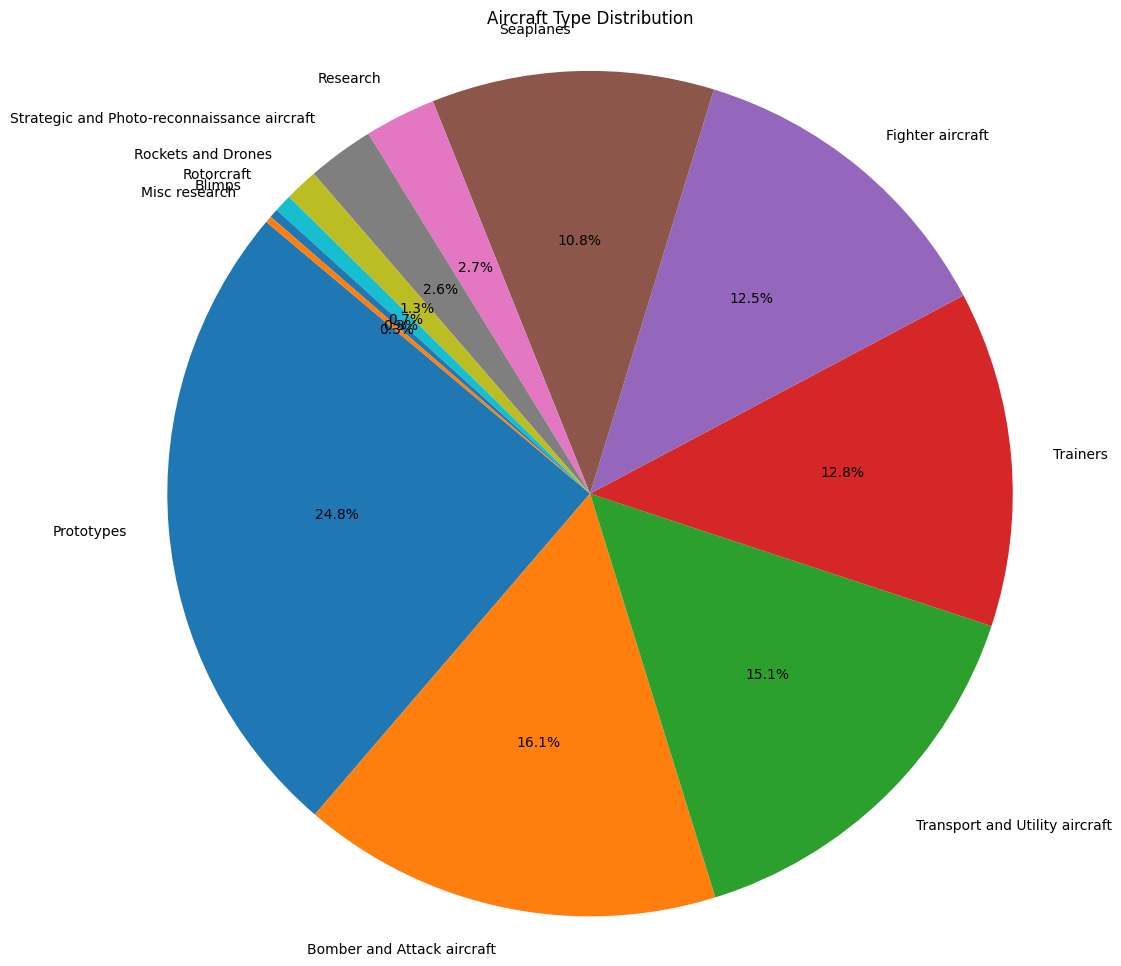

In [28]:
plt.figure(figsize=(12,12))
plt.pie(aircraft_counts,labels=aircraft_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Aircraft Type Distribution')
plt.axis('equal')
plt.show()